In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [369]:
df = pd.read_csv('PIB.csv', encoding='utf-8')
df = df.fillna(0)
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,61.042300,67.813322,65.241349,76.509512,77.555556,73.517030,71.294029,73.332115,0.000000,0.000000
1,Afganistán,AFG,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,4.132233,4.453443,4.878051,9.171601,8.888893,11.258279,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Angola,AGO,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,61.543113,60.669948,55.940131,50.747084,44.695031,29.754599,28.124485,29.004100,40.836290,40.556871
3,Albania,ALB,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,27.979449,29.241501,28.937487,28.916354,28.212979,27.267393,28.977864,31.569821,31.591574,31.555552
4,Andorra,AND,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19.945479,23.630699,23.256504,21.929561,22.502021,21.937317,23.698127,26.649932,26.431364,29.215526
260,"Yemen, Rep. del",YEM,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
261,Sudáfrica,ZAF,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,29.550915,29.323968,29.406919,28.613876,27.435897,25.704051,...,28.615233,30.460941,29.723879,30.971341,31.468645,30.152888,30.580928,29.627669,29.907083,29.853839
262,Zambia,ZMB,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,37.025933,40.471223,40.082911,40.482717,38.822290,37.138526,35.324676,34.992858,37.957353,34.636161


In [370]:
df = df[df['Country Name'].isin(['Ecuador'])] #Filtro la Informacion solo para Ecuador
df.drop(['Country Code','Indicator Code','Indicator Name'], axis='columns', inplace=True)
df

C:\Users\vazqu\anaconda3\envs\tesis\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
64,Ecuador,9.547575,8.957493,10.241499,9.233322,8.900054,8.979657,10.4857,10.107187,11.042166,...,27.894956,31.1212,30.164809,28.638288,28.051854,21.258221,19.504791,20.832818,22.604684,23.39004


In [371]:
df=df.T
df.columns = df.iloc[0]
df=df.drop(['Country Name'])

In [372]:
df['Anio']=df.index

Text(0, 0.5, 'Valor')

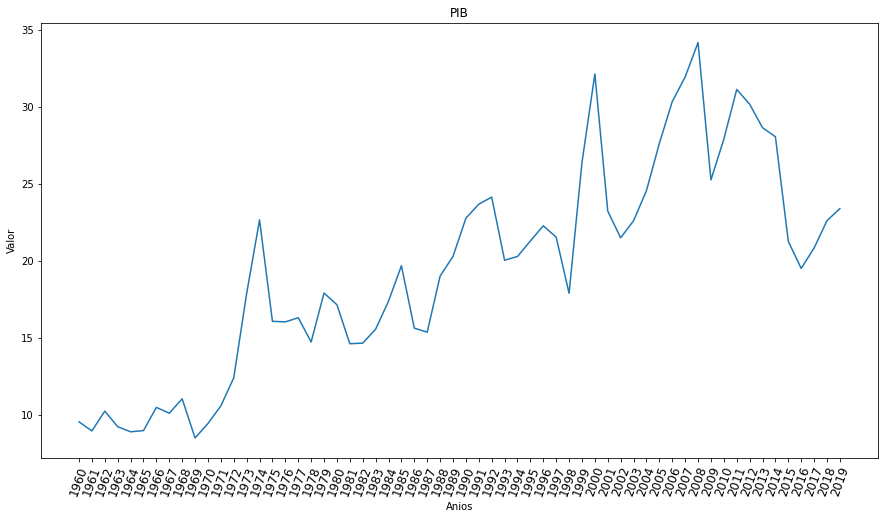

In [461]:
plt.figure(figsize=(15,8))
plt.plot(df['Anio'], df['Ecuador'],'-',label='')
plt.xticks(rotation=70,color='black', size=12)
plt.title('PIB')  
plt.xlabel('Anios')  
plt.ylabel('Valor') 

In [384]:
x=df['Anio'].values.reshape(-1,1)
y=df['Ecuador']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=42)

In [385]:
model=LinearRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test) #x_train

In [517]:
anios=np.arange(1960, 2020, dtype=int)
predecir_anios= model.predict(anios.reshape(-1,1))

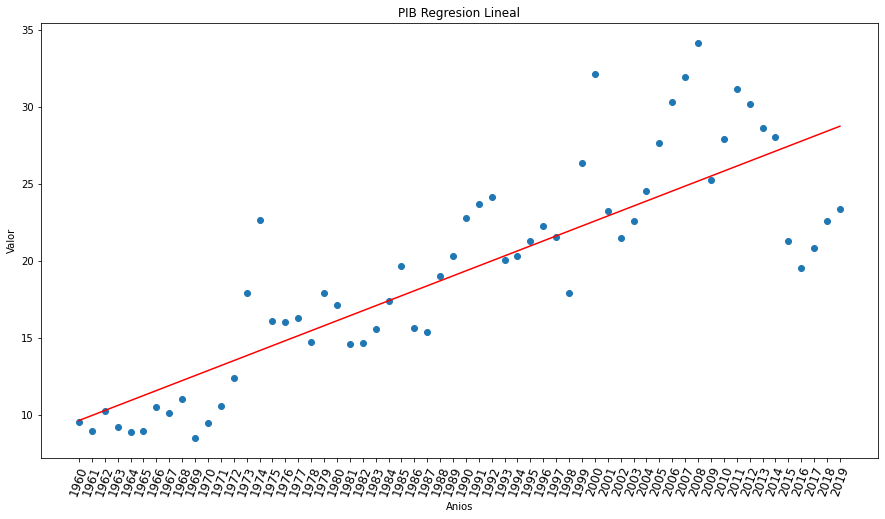

In [535]:
plt.figure(figsize=(15,8))
plt.scatter(x.flatten(),y)
plt.plot(x.flatten(),predecir_anios,'-r')
plt.xticks(rotation=70,color='black', size=12)
plt.xlabel('Anios')  
plt.ylabel('Valor') 
plt.title('PIB Regresion Lineal')
plt.show() 

In [499]:

print('Precisión del modelo, valores Train = ',model.score(X_train, y_train))
print()

Precisión del modelo, valores Train =  0.699017421534448



MODELO REGRESION NO LINEAL - RANDOM FOREST

In [409]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [410]:
#modelo de regresion no lineal 
model_rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)
model_rf.fit(X_train, y_train) 
pred_train_rf= model_rf.predict(X_train)

In [411]:
print(np.sqrt(mean_squared_error(y_train,pred_train_rf)))
print("Precision del modelo, valores Train = ",r2_score(y_train, pred_train_rf))

pred_test_rf = model_rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print("Precision del modelo, valores test = ",r2_score(y_test, pred_test_rf))

1.0414033813217687
Precision del modelo, valores Train =  0.9737291687193788
1.9601223466324549
Precision del modelo, valores test =  0.9391672795784315


In [413]:
pred_ani=model_rf.predict(anios.reshape(-1,1))

____________________________________

                                            RESULTADOS


_____________________________

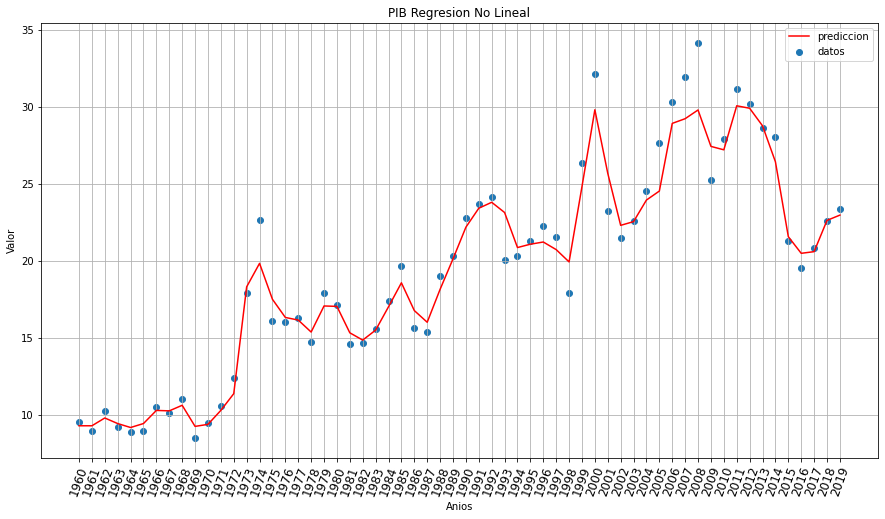

In [536]:
plt.figure(figsize=(15,8))
plt.scatter(x=x.flatten(),y=y, label='datos')
plt.plot(x.flatten(),pred_ani,'-r', label="prediccion")
plt.xticks(rotation=70,color='black', size=12)
plt.grid(True)
plt.title("PIB Regresion No Lineal")
plt.xlabel('Anios')  
plt.ylabel('Valor') 
plt.legend()
plt.show() 

Text(0.5, 1.0, 'Regresion No Lineal')

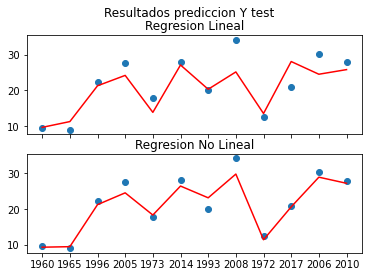

In [528]:
fig, (ax1, ax2) = plt.subplots(2,sharex=True)
fig.suptitle('Resultados prediccion Y test')
ax1.scatter(X_test.flatten(),y_test)
ax1.plot(X_test.flatten(),y_pred,'-r')
ax1.set_title('Regresion Lineal') 
ax2.scatter(X_test.flatten(),y_test)
ax2.plot(X_test.flatten(),pred_test_rf,'-r')
ax2.set_title('Regresion No Lineal')

Prediccion Datos 
________________

In [525]:

actual=df.loc['2019'][0]
anio=model.predict([[2020]])
print('Valor PIB 2019 = ',actual)
print('Prediccion Regresion Lineal = ', anio[0])
print('Prediccion Regresion RandomForest = ', model_rf.predict([[2019]])[0])

Valor PIB 2019 =  23.39003998
Prediccion Regresion Lineal =  29.058548960023586
Prediccion Regresion RandomForest =  22.965325112560105


ANALISIS
________________

Al con datos bastantes dispersos, y como podemos observar en la primera grafica donde se muestra cuanto a ido variando el PIB en ultimos años, por lo que trabajar con una regresion lineal deja muchos datos residuales y esto a su vez afecta en gran cantidad a la prediccion de un nuevo año e inclusive predecir uno de los datos que ya disponibles cuenta con un gran margen de error.
Como se observa en el grafico titulado "PIB Regresion Lineal" se observa claramente como la linea roja que simboliza la regresion deja de lado gran parte de los datos, como son los datos de los ultimos 6 años y esto afecta de una manera considerable al predecir de un año siguiente, ya que solo tomaria los datos que se encuentran en el rango de 25-10 años antes

Al cambiar el tipo de regresion, que en este caso lo recomendable es a una no Lineal que nos permitira abarcar de mejor manera los datos y no dejando muchs datos residuales. 
Por otro lado se observa en la grafica "PIB Regresion No Lineal" donde claramente se observa la distribucion del PIB en los ultimos años y como la regresion logra abarcar una gran cantidad de puntos, la cual nos da por entender que el modelo que mas se acerca a la realidad. 
Asi mismo se lo realizo la comparacion de la prediccion de los modelos tanto lineal como no lineal donde la regresion no lineal es mas ajustada y abarca la mayor cantidad de puntos.

Tambien la prediccion del año 2019 que se realizo, donde se evidencio que el modelo no lineal cuenta con un margen de error muy pequeño en comparacion al modelo lineal.

CONCLUSIONES
______________________

El PIB del Ecuador depende de muchos factores en los ultimos años, por lo que predecir exactamente lo que sucedera en los proximos 3 años o mas sera un poco complicado aunque nuestro modelo se acerque bastante a los datos anteriormente proporcionados, como se puede evidenciar actualmente con la pandemia que afecto considerablemente a la economia mundial, esto era algo que nadie podria predecir que iba a suceder.

BIBLIOGRAFIA
____________

Random Forest Regression: https://www.keboola.com/blog/random-forest-regression
    